#Linear Regression


##Maximum likelihood estimation
$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
where $\boldsymbol x\in\mathbb{R}^D$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\boldsymbol\theta\in\mathbb{R}^D$ parametrizes the function.
We will start with maximum likelihood estimation of the parameters $\boldsymbol\theta$. In maximum likelihood estimation, we find the parameters $\boldsymbol\theta^{\mathrm{ML}}$ that maximize the likelihood
$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,.
$$
From the lecture we know that the maximum likelihood estimator is given by
$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,,
$$
where 
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$


In [62]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

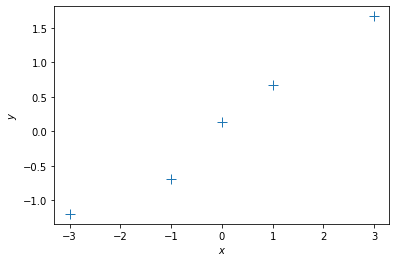

In [63]:
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [64]:
def max_lik_estimate(X, y):
    N, D = X.shape
    theta_ml = np.linalg.solve(X.T @ X, X.T @ y)
    return theta_ml

In [65]:
theta_ml = max_lik_estimate(X,y)
print(theta_ml)
def predict_with_estimate(Xtest, theta):
    prediction = Xtest @ theta
    return prediction 
Xtest = np.linspace(-5,5,100).reshape(-1,1)

[[0.499]]


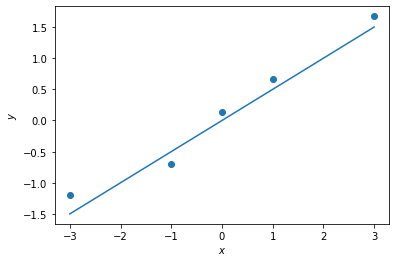

In [66]:
ml_prediction = predict_with_estimate(X, theta_ml)

# plot
plt.figure()
plt.scatter(X, y)
plt.plot(X, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

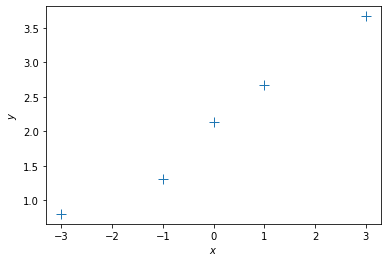

In [67]:
for i in range(len(y)):
  y[i] += 2

plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

[[0.499]]


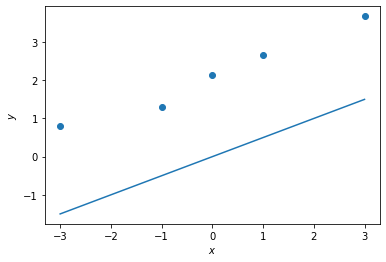

In [68]:
theta_ml = max_lik_estimate(X, y)
print(theta_ml)
Xtest = np.linspace(-3,3,100).reshape(-1,1)

ml_prediction = predict_with_estimate(Xtest, theta_ml)
plt.figure()
plt.scatter(X, y)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");


Let us now define a linear regression model that is slightly more flexible:
$$
y = \theta_0 + \boldsymbol x^T \boldsymbol\theta_1 + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^2)
$$
Here, we added an offset (bias) parameter $\theta_0$ to our original model.
If we now define the inputs to be the augmented vector $\boldsymbol x_{\text{aug}} = \begin{bmatrix}1\\\boldsymbol x\end{bmatrix}$, we can write the new linear regression model as 
$$
y = \boldsymbol x_{\text{aug}}^T\boldsymbol\theta_{\text{aug}} + \epsilon\,,\quad \boldsymbol\theta_{\text{aug}} = \begin{bmatrix}
\theta_0\\
\boldsymbol\theta_1
\end{bmatrix}\,.
$$

In [69]:
N, D = X.shape
lcs = []
for i in range(len(X)):
  lcs.append([1])

X_aug = np.hstack((lcs, X))

In [70]:
def max_lik_estimate_aug(X_aug, y):
    theta_aug_ml = max_lik_estimate(X_aug, y)
    return theta_aug_ml
theta_aug_ml = max_lik_estimate_aug(X_aug, y)

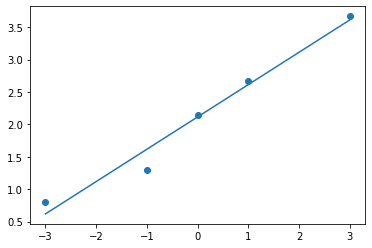

In [71]:
ml_prediction = predict_with_estimate(X_aug, theta_aug_ml)
plt.figure()
plt.scatter(X, y)
plt.plot(X, ml_prediction)
plt.show()

##Linear Algebra


0.49900000000000005 0.11600000000000002
[-1.381, -0.383, 0.11600000000000002, 0.6150000000000001, 1.6130000000000002]


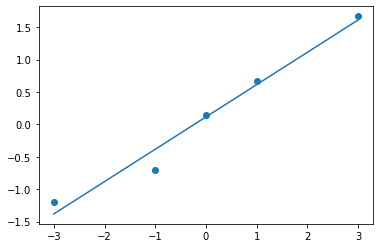

In [72]:
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import figure
x = [-3, -1, 0, 1, 3]
y = [-1.2, -0.7, 0.14, 0.67, 1.67]
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(slope, intercept)
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
print(mymodel)
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

0.49900000000000005 0.11600000000000002
[-1.381, -0.383, 0.11600000000000002, 0.6150000000000001, 1.6130000000000002]


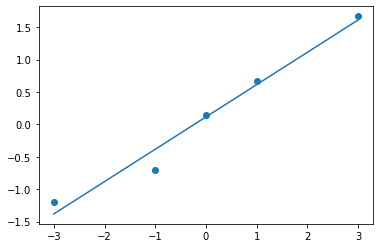

In [73]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(slope, intercept)
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
print(mymodel)
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

## Nonlinear Features
So far, we have looked at linear regression with linear features. This allowed us to fit straight lines. However, linear regression also allows us to fit functions that are nonlinear in the inputs $\boldsymbol x$, as long as the parameters $\boldsymbol\theta$ appear linearly. This means, we can learn functions of the form
$$
f(\boldsymbol x, \boldsymbol\theta) = \sum_{k = 1}^K \theta_k \phi_k(\boldsymbol x)\,,
$$
where the features $\phi_k(\boldsymbol x)$ are (possibly nonlinear) transformations of the inputs $\boldsymbol x$.

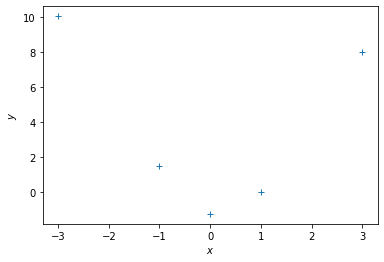

In [74]:
y1 = np.array([10.05, 1.5, -1.234, 0.02, 8.03]).reshape(-1,1)
plt.figure()
plt.plot(X, y1, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

#### Polynomial Regression
One class of functions that is covered by linear regression is the family of polynomials because we can write a polynomial of degree $K$ as
$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^T\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$
Here, $\boldsymbol\phi(x)$ is a nonlinear feature transformation of the inputs $x\in\mathbb{R}$.

Similar to the earlier case we can define a matrix that collects all the feature transformations of the training inputs:
$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^T \in\mathbb{R}^{N\times K+1}
$$

With this feature matrix we get the maximum likelihood estimator as
$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$
For reasons of numerical stability, we often add a small diagonal "jitter" $\kappa>0$ to $\boldsymbol\Phi^T\boldsymbol\Phi$ so that we can invert the matrix without significant problems so that the maximum likelihood estimate becomes
$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi + \kappa\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

In [75]:
def poly_features(X, K):
    X = X.flatten()
    N = X.shape[0]
    Phi = np.zeros((N, K+1))
    for k in range(K+1):
        Phi[:,k] = X**k
    return Phi

def nonlinear_features_maximum_likelihood(Phi, y):
    k = 1e-08 
    D = Phi.shape[1]  
    Pt = Phi.T @ y 
    PP = Phi.T @ Phi + k*np.eye(D) ## eye
    C = scipy.linalg.cho_factor(PP)
    theta_ml = scipy.linalg.cho_solve(C, Pt) 
    return theta_ml

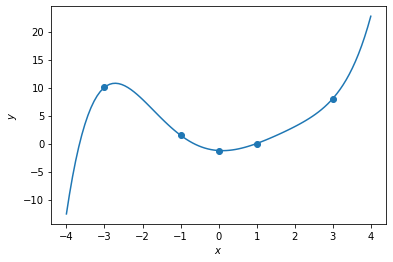

In [76]:
K = 5 
Phi = poly_features(X, K) 

theta_ml = nonlinear_features_maximum_likelihood(Phi, y1)

Xtest = np.linspace(-4,4,100).reshape(-1,1)


Phi_test = poly_features(Xtest, K)

y_pred = Phi_test @ theta_ml 

plt.figure()
plt.scatter(X, y1)
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

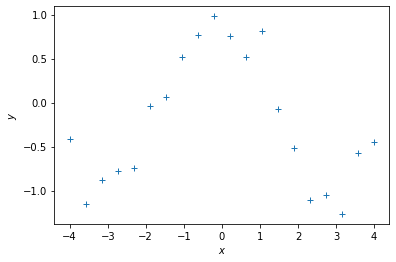

In [77]:
def f(x):   
    return np.cos(x) + 0.2*np.random.normal(size=(x.shape))

X1 = np.linspace(-4,4,20).reshape(-1,1)
y2 = f(X1)

plt.figure()
plt.plot(X1, y2, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

Text(0, 0.5, '$y$')

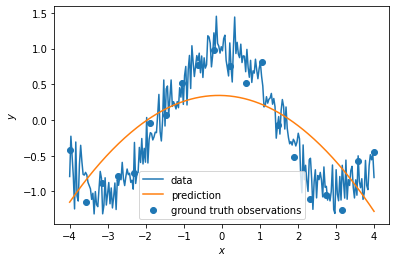

In [78]:
K = 2
Phi = poly_features(X1, K)
theta_ml = nonlinear_features_maximum_likelihood(Phi, y2)
Xtest = np.linspace(-4,4,250).reshape(-1,1)
ytest = f(Xtest)
Phi_test = poly_features(Xtest, K)
y_pred = Phi_test @ theta_ml
plt.figure()
plt.scatter(X1, y2)
plt.plot(Xtest, ytest)
plt.plot(Xtest, y_pred)
plt.legend(["data", "prediction", "ground truth observations"])
plt.xlabel("$x$")
plt.ylabel("$y$")

Let us now look at a more systematic way to assess the quality of the polynomial that we are trying to fit. For this, we compute the root-mean-squared-error (RMSE) between the $y$-values predicted by our polynomial and the ground-truth $y$-values. The RMSE is then defined as
$$
**\text{RMSE} = \sqrt{\frac{1}{N}\sum_{n=1}^N(y_n - y_n^\text{pred})^2}**
$$
Write a function that computes the RMSE.

In [79]:
def RMSE(y, ypred):
    rmse = np.sqrt(np.mean((y-ypred)**2))
    return rmse

[0.72244542 0.7213898  0.50853193 0.50166628 0.18200033 0.18194193
 0.17571099 0.15121632 0.14944929 0.14101145 0.13522618 0.13248571
 0.12941088 0.10704078 0.10314136 0.09036636 0.08410842 0.08039262
 0.01549738 0.01529896 0.01572112]


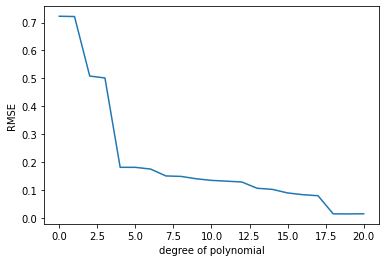

In [80]:
K_max = 20
rmse_train = np.zeros((K_max+1,))

for k in range(K_max+1):
    Phi = poly_features(X1, k)
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y2)
    ypred_train = Phi @ theta_ml
    rmse_train[k] = RMSE(y2, ypred_train)
    
print(rmse_train)
plt.figure()
plt.plot(rmse_train)
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE");

Text(0, 0.5, '$y$')

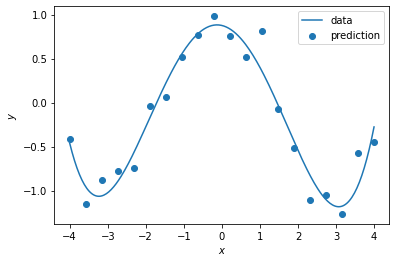

In [81]:
K = 5
Phi = poly_features(X1, K)
theta_ml = nonlinear_features_maximum_likelihood(Phi, y2)
Xtest = np.linspace(-4,4,250).reshape(-1,1)
ytest = f(Xtest)
Phi_test = poly_features(Xtest, K)
y_pred = Phi_test @ theta_ml
plt.figure()
plt.plot(Xtest, y_pred)
plt.scatter(X1, y2)
plt.legend(["data", "prediction"])
plt.xlabel("$x$")
plt.ylabel("$y$")

-0.013142323056891447
-0.012109170614806652
-0.04712317046317993
-0.03163247264218999
0.05789573321336025
0.058616640023194055
0.04957422574868092
0.07106568651350151
0.07089232444632176
0.07609294960084864
0.09945400687502845
0.11410066763483151
0.10910748487233199
0.12401091839400948
0.13321490607763642
0.14533689232513894
0.14978984040062565
0.15600256343847468
0.2337336280882714
0.23492299539624037
0.23448529967950477


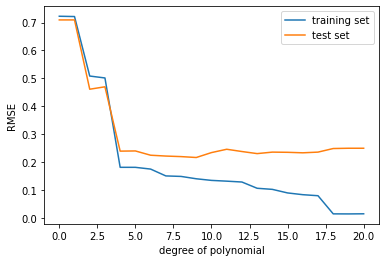

In [82]:
K_max = 20
rmse_train = np.zeros((K_max+1,))
rmse_test = np.zeros((K_max+1,))
Xtest_1 = np.linspace(-4,4,20).reshape(-1,1)
ytest_1 = f(Xtest_1)
for k in range(K_max+1):
  Phi = poly_features(X1, k)
  theta_ml = nonlinear_features_maximum_likelihood(Phi, y2)
  ypred_train = Phi @ theta_ml
  rmse_train[k] = RMSE(y2, ypred_train)
  Phi_test = poly_features(Xtest_1, k)
  ypred_test = Phi_test @ theta_ml
  rmse_test[k] = RMSE(ytest_1, ypred_test)
  print(rmse_test[k] - rmse_train[k])

plt.figure()
plt.plot(rmse_train) # this plots the RMSE on a logarithmic scale
plt.plot(rmse_test) # this plots the RMSE on a logarithmic scale
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["training set", "test set"]);

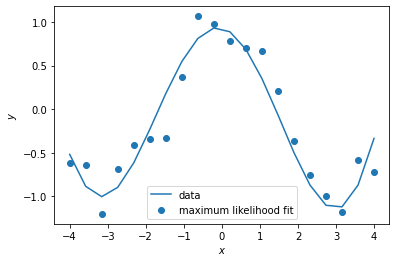

In [83]:
plt.figure()
plt.scatter(Xtest_1, ytest_1)
k = 6
# feature matrix
Phi = poly_features(X1, k)

# maximum likelihood estimate
theta_ml = nonlinear_features_maximum_likelihood(Phi, y2)   

# feature matrix for test inputs
Phi_test = poly_features(Xtest_1, k)

ypred_test = Phi_test @ theta_ml

plt.plot(Xtest_1, ypred_test) 
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["data", "maximum likelihood fit"]);

##Maximum A Posteriori Estimation

We are still considering the model
$$
y = \boldsymbol\phi(\boldsymbol x)^T\boldsymbol\theta + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^2)\,.
$$
We assume that the noise variance $\sigma^2$ is known.
Instead of maximizing the likelihood, we can look at the maximum of the posterior distribution on the parameters $\boldsymbol\theta$, which is given as
$$
p(\boldsymbol\theta|\mathcal X, \mathcal Y) = \frac{\overbrace{p(\mathcal Y|\mathcal X, \boldsymbol\theta)}^{\text{likelihood}}\overbrace{p(\boldsymbol\theta)}^{\text{prior}}}{\underbrace{p(\mathcal Y|\mathcal X)}_{\text{evidence}}}
$$
The purpose of the parameter prior $p(\boldsymbol\theta)$ is to discourage the parameters to attain extreme values, a sign that the model overfits. The prior allows us to specify a "reasonable" range of parameter values. Typically, we choose a Gaussian prior $\mathcal N(\boldsymbol 0, \alpha^2\boldsymbol I)$, centered at $\boldsymbol 0$ with variance $\alpha^2$ along each parameter dimension.
The MAP estimate of the parameters is
$$
\boldsymbol\theta^{\text{MAP}} = (\boldsymbol\Phi^T\boldsymbol\Phi + \frac{\sigma^2}{\alpha^2}\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$
where $\sigma^2$ is the variance of the noise.

In [84]:
def map_estimate_poly(Phi, y, sigma, alpha):
   
    D = Phi.shape[1] 
    PP = Phi.T @ Phi + (sigma/alpha)**2 * np.eye(D)
    theta_map = scipy.linalg.solve(PP, Phi.T @ y)
    
    return theta_map

In [85]:
def g(x, sigma):
    p = np.hstack([x**0, x**1, np.sin(x)])
    w = np.array([-1.0, 0.1, 1.0]).reshape(-1,1)
    #print(p)
    #print(w)
    return p @ w + sigma*np.random.normal(size=x.shape) 

[[-3.08871569]
 [-1.21404926]
 [-0.94375743]
 [-1.47949797]
 [ 0.41548755]
 [-1.27573109]
 [-0.41707151]
 [-2.55559866]
 [-0.59582473]
 [ 0.19177411]
 [-1.63375007]
 [-1.15430381]
 [-1.45001287]
 [-1.84124823]
 [-1.87973476]
 [ 0.56004253]
 [-2.13538298]
 [-1.78791123]
 [-0.87473052]
 [-3.29896378]]


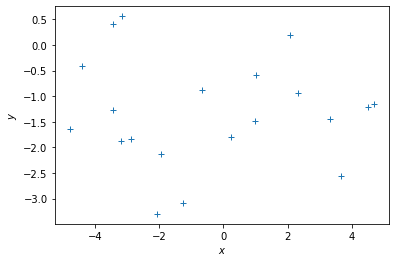

In [86]:
sigma = 1.0 
alpha = 1.0
N = 20
np.random.seed(42)

X5 = (np.random.rand(N)*10.0 - 5.0).reshape(-1,1)
y5 = g(X5, sigma) 
print(y5)
plt.figure()
plt.plot(X5, y5, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

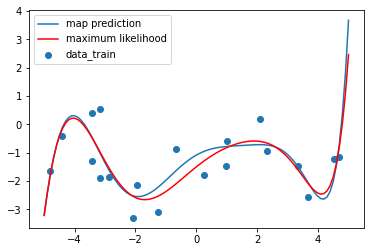

In [95]:
K = 8
Phi = poly_features(X5, K)
theta_map = map_estimate_poly(Phi, y5, sigma, alpha)
theta_ml = nonlinear_features_maximum_likelihood(Phi, y5)
Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = g(Xtest, sigma)

Phi_test = poly_features(Xtest, K)
y_pred_map = Phi_test @ theta_map
y_pred_mle = Phi_test @ theta_ml

plt.figure()
plt.scatter(X5, y5)
plt.plot(Xtest, y_pred_map)
plt.plot(Xtest, y_pred_mle, c = 'r')
plt.legend(["map prediction", "maximum likelihood", "data_train"]);

In [88]:
print(theta_ml)

[[-1.49712990e+00]
 [ 8.56868912e-01]
 [-1.28335730e-01]
 [-7.75319509e-02]
 [ 3.56425467e-02]
 [-4.11626749e-03]
 [-2.48817783e-03]
 [ 2.70146690e-04]
 [ 5.35996050e-05]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: LinAlgWarning: Ill-conditioned matrix (rcond=1.82839e-17): result may not be accurate.
  """


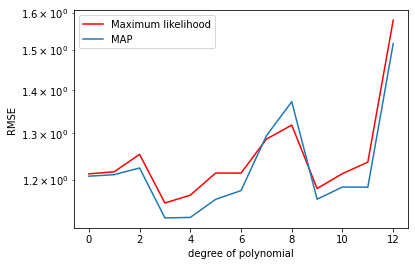

In [108]:
K_max = 12
assert(K_max < N)
rmse_mle = np.zeros((K_max+1,))
rmse_map = np.zeros((K_max+1,))
for k in range(K_max+1):
  Phi = poly_features(X5, k)
  theta_ml = nonlinear_features_maximum_likelihood(Phi, y5)
  theta_map = map_estimate_poly(Phi, y5, sigma, alpha)
  Phi_test = poly_features(Xtest, k)
  y_pred_map = Phi_test @ theta_map
  y_pred_mle = Phi_test @ theta_ml 
  rmse_mle[k] = RMSE(ytest,  y_pred_mle) 
  rmse_map[k] = RMSE(ytest,  y_pred_map) 
plt.figure()
plt.semilogy(rmse_mle, c = 'r') 
plt.semilogy(rmse_map)
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["Maximum likelihood", "MAP"])